<a href="https://colab.research.google.com/github/AvinashGadpayle/Netflix-Stock-Price-Pridiction-/blob/main/Netflix_Stock_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from google.colab import files
import io

In [2]:
uploaded= files.upload()

Saving NFLX.csv to NFLX (1).csv


# Dataset

In [3]:
df= pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


# Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df.drop(["Date"], axis = 1, inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


# EDA

Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

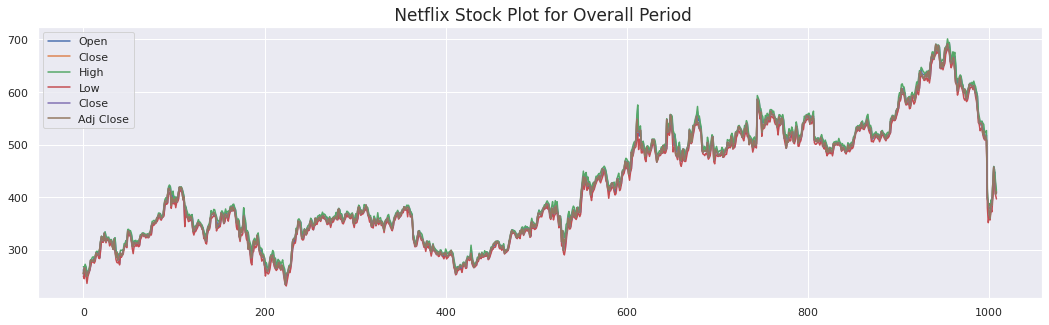

In [9]:
#Overall period
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

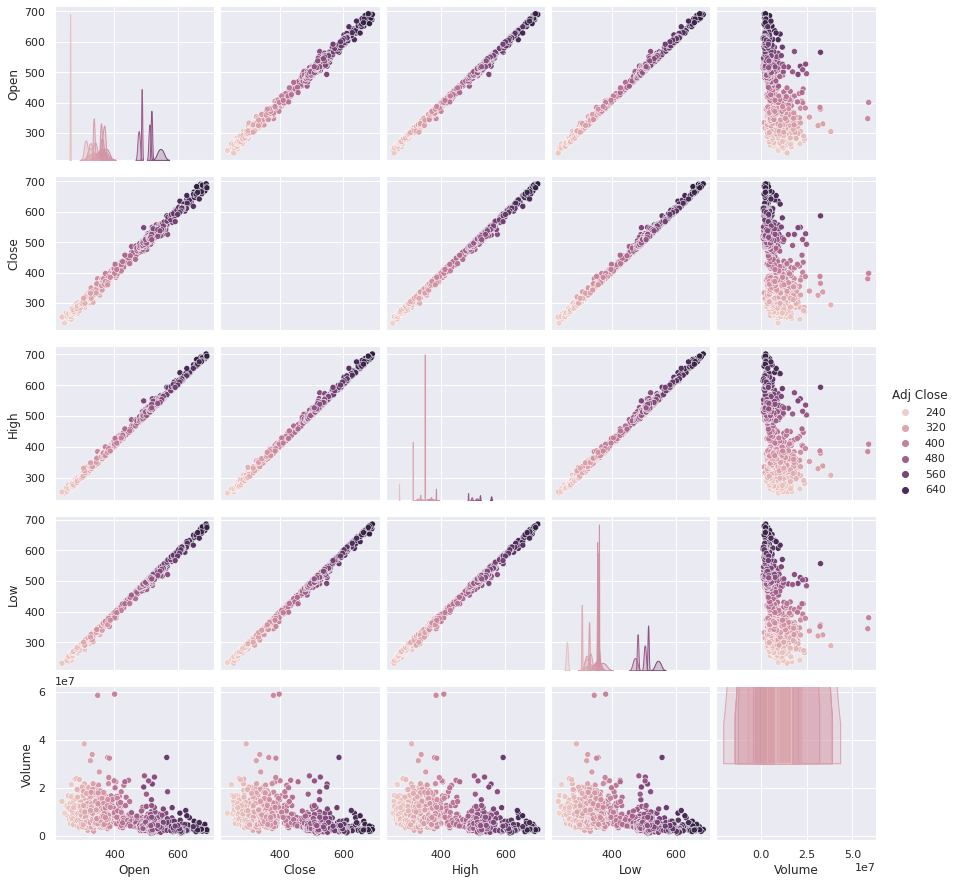

In [22]:
#Pairplot 
sns.pairplot(df, hue="Adj Close", vars=['Open','Close','High','Low','Volume'])
plt.show()

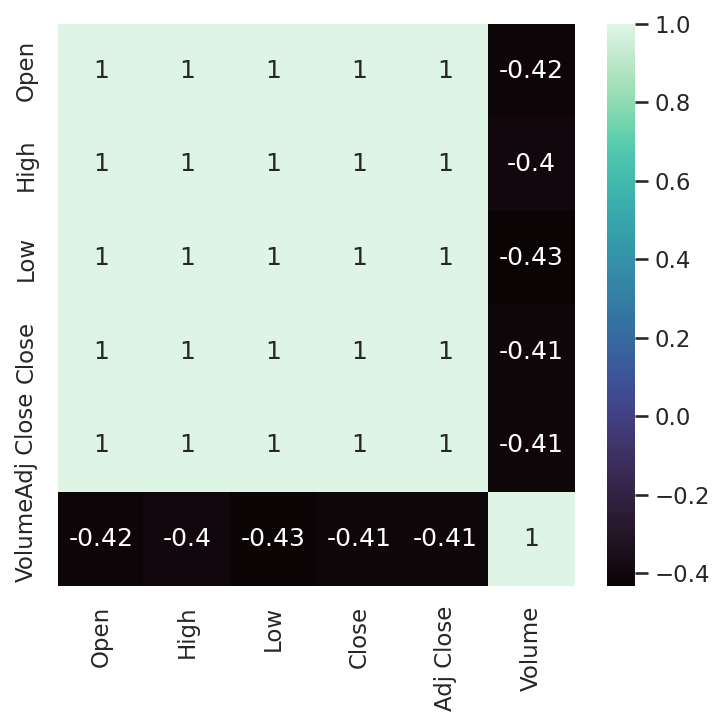

In [27]:
#Correlation matrix
plt.figure(figsize=(5,5),dpi=150,tight_layout=True)
sns.heatmap(df.corr(),annot=True,cmap="mako")

# Split test and train

In [10]:
x = df[['Open','Close','High','Low','Volume']]
y = df['Adj Close']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2,)

# Model

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)
y_pred

array([288.850006  , 310.480011  , 547.919983  , 348.410004  ,
       625.580017  , 575.429993  , 488.769989  , 271.5       ,
       403.829987  , 365.48999   , 332.700012  , 421.380005  ,
       522.419983  , 336.299988  , 329.089996  , 246.389999  ,
       333.160004  , 482.880005  , 556.52002   , 291.380005  ,
       534.659973  , 369.209991  , 499.549988  , 309.100006  ,
       346.459991  , 359.459991  , 339.170013  , 370.019989  ,
       507.019989  , 369.609985  , 341.179993  , 381.429993  ,
       367.880005  , 302.570007  , 335.829987  , 351.829987  ,
       264.75      , 530.869995  , 361.049988  , 493.480011  ,
       354.450012  , 367.679993  , 523.890015  , 293.25      ,
       605.039978  , 485.809998  , 499.079987  , 514.25      ,
       348.679993  , 379.23999   , 278.549988  , 324.660004  ,
       351.600006  , 408.25      , 586.72998   , 483.859985  ,
       425.920013  , 361.410004  , 302.5       , 349.730011  ,
       387.14999399, 563.590027  , 361.190002  , 502.89

In [15]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, y_pred), 4))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
(R^2) Score: 1.0


In [16]:
model.score(x,y)

1.0

# Predictions

In [17]:
predictions = pd.DataFrame({"Predictions": y_pred}, index=pd.date_range(start=df.index[-1], periods=len(y_pred), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

oneyear = pd.DataFrame(predictions[:150])
oneyear.to_csv("one-year-predictions.csv")

sixmonth = pd.DataFrame(predictions[:100])
sixmonth.to_csv("six-month-predictions.csv")



Buy Date and Price of Stock
                       Unnamed: 0  Predictions
15  1970-01-16 00:00:00.000001008   246.389999 

Sell Date and Price of stock
                        Unnamed: 0  Predictions
118  1970-04-29 00:00:00.000001008   668.400024


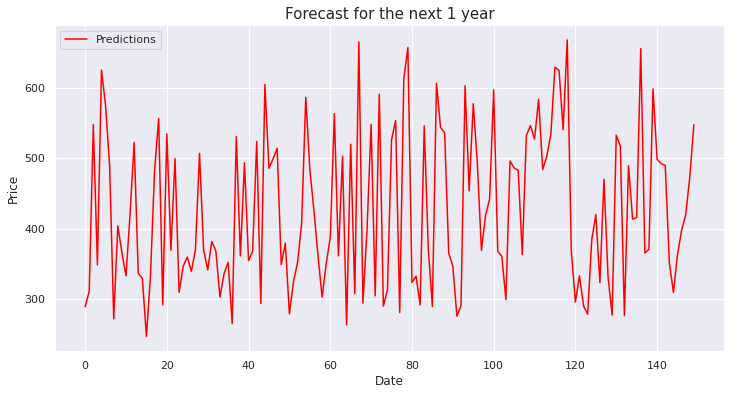

In [18]:
oneyear_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_pred["Predictions"])
sell_price = max(oneyear_pred["Predictions"])
oneyear_buy = oneyear_pred.loc[oneyear_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_pred.loc[oneyear_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_pred["Predictions"].plot(figsize=(12, 6), color="red")
plt.title("Forecast for the next 1 year", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
                       Unnamed: 0  Predictions
15  1970-01-16 00:00:00.000001008   246.389999 

Sell price and date
                       Unnamed: 0  Predictions
67  1970-03-09 00:00:00.000001008   665.640015


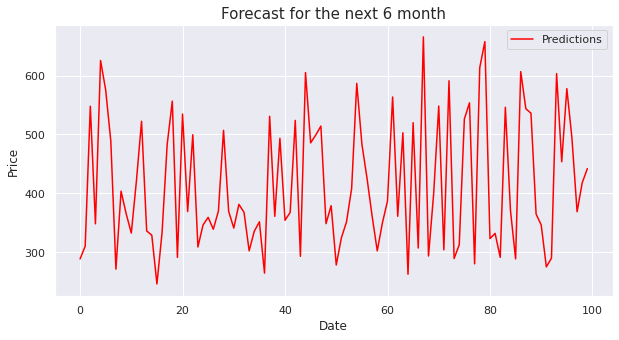

In [19]:
sixmonth_pred = pd.read_csv("six-month-predictions.csv")
buy_price = min(sixmonth_pred["Predictions"])
sell_price = max(sixmonth_pred["Predictions"])
onemonth_buy = sixmonth_pred.loc[sixmonth_pred["Predictions"] == buy_price]
onemonth_sell = sixmonth_pred.loc[sixmonth_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
sixmonth_pred["Predictions"].plot(figsize=(10, 5), color="red")
plt.title("Forecast for the next 6 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()